Power Output: 8829.00 kW
Selected Turbine: Francis
Capital Cost: $13,243,500.00
Annual Revenue: $7,734,204.00
Payback Period: 1.71 years


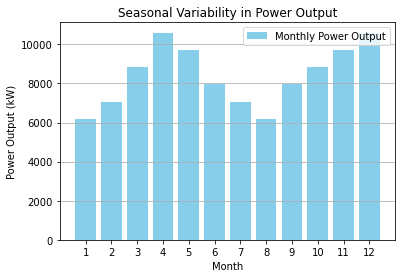

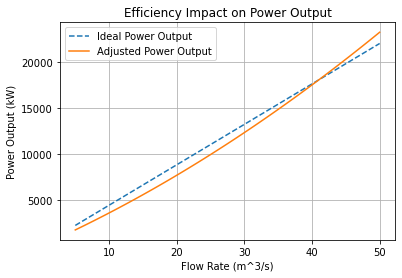

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Gravitational acceleration (m/s^2)
rho = 1000  # Water density (kg/m^3)

# User Inputs
head = 50  # Net head in meters
flow_rate = 20  # Flow rate in cubic meters per second (m^3/s)
efficiency = 0.9  # Efficiency of the turbine (fraction, e.g., 90%)

# Function to calculate power
def calculate_power(flow_rate, head, efficiency):
    """
    Calculate the power output of a hydroelectric power plant.
    :param flow_rate: Flow rate (m^3/s)
    :param head: Head (m)
    :param efficiency: Turbine efficiency (fraction)
    :return: Power (kW)
    """
    power = efficiency * rho * g * flow_rate * head
    return power / 1000  # Convert to kW

# Turbine Selection
turbine_types = {
    "Pelton": {"head_range": (50, 1000), "flow_range": (1, 10)},
    "Francis": {"head_range": (10, 300), "flow_range": (5, 50)},
    "Kaplan": {"head_range": (2, 20), "flow_range": (10, 100)},
}

def select_turbine(head, flow_rate):
    """
    Select a suitable turbine based on head and flow rate.
    """
    for turbine, specs in turbine_types.items():
        if specs["head_range"][0] <= head <= specs["head_range"][1] and specs["flow_range"][0] <= flow_rate <= specs["flow_range"][1]:
            return turbine
    return "No suitable turbine found"

# Economic Analysis
def economic_analysis(power_output, cost_per_kw=1500, electricity_price=0.1):
    """
    Calculate capital cost, annual revenue, and payback period.
    :param power_output: Power output (kW)
    :param cost_per_kw: Capital cost per kW ($)
    :param electricity_price: Price per kWh ($/kWh)
    :return: Capital cost, annual revenue, payback period (years)
    """
    capital_cost = power_output * cost_per_kw
    annual_revenue = power_output * 8760 * electricity_price  # 8760 hours/year
    payback_period = capital_cost / annual_revenue
    return capital_cost, annual_revenue, payback_period

# Seasonal Variability
def seasonal_variability(head, flow_rate, months):
    """
    Simulate power output over months with variable flow rates.
    :param head: Head (m)
    :param flow_rate: Average flow rate (m^3/s)
    :param months: List of monthly flow rate factors (e.g., [0.8, 1.2, ...])
    :return: List of monthly power outputs (kW)
    """
    monthly_powers = []
    for factor in months:
        monthly_flow = flow_rate * factor
        monthly_power = calculate_power(monthly_flow, head, efficiency)
        monthly_powers.append(monthly_power)
    return monthly_powers

# Main Execution
power_output = calculate_power(flow_rate, head, efficiency)
selected_turbine = select_turbine(head, flow_rate)

# Economic Analysis
capital_cost, annual_revenue, payback_period = economic_analysis(power_output)

# Seasonal Variability Simulation
monthly_factors = [0.7, 0.8, 1.0, 1.2, 1.1, 0.9, 0.8, 0.7, 0.9, 1.0, 1.1, 1.2]
monthly_powers = seasonal_variability(head, flow_rate, monthly_factors)

# Display Results
print(f"Power Output: {power_output:.2f} kW")
print(f"Selected Turbine: {selected_turbine}")
print(f"Capital Cost: ${capital_cost:,.2f}")
print(f"Annual Revenue: ${annual_revenue:,.2f}")
print(f"Payback Period: {payback_period:.2f} years")

# Plot Seasonal Power Output
plt.figure()
months = np.arange(1, 13)
plt.bar(months, monthly_powers, color="skyblue", label="Monthly Power Output")
plt.xlabel("Month")
plt.ylabel("Power Output (kW)")
plt.title("Seasonal Variability in Power Output")
plt.xticks(months)
plt.grid(axis="y")
plt.legend()
plt.show()

# Plot Efficiency Curve
def plot_efficiency_curve():
    flow_rates = np.linspace(5, 50, 100)  # Vary flow rate between 5 and 50 m^3/s
    power_outputs = [calculate_power(flow, head, efficiency) for flow in flow_rates]
    efficiency_curve = np.linspace(0.7, 0.95, len(flow_rates))  # Example efficiency curve
    adjusted_power = [calculate_power(flow, head, eff) for flow, eff in zip(flow_rates, efficiency_curve)]

    plt.figure()
    plt.plot(flow_rates, power_outputs, label="Ideal Power Output", linestyle="--")
    plt.plot(flow_rates, adjusted_power, label="Adjusted Power Output")
    plt.xlabel("Flow Rate (m^3/s)")
    plt.ylabel("Power Output (kW)")
    plt.title("Efficiency Impact on Power Output")
    plt.legend()
    plt.grid()
    plt.show()

plot_efficiency_curve()
